In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('../music_crawler/Dataset.csv')
df

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.314127,0.083577,0.109954,0.000880,1172.886766,2.321295e+04,1167.295088,11340.641605,2125.553814,9.379492e+04,...,61.178032,1.798444,72.900764,-1.773214,50.262657,-7.825616,74.755190,-3.863794,56.945137,blues
1,0.234914,0.084112,0.025381,0.000391,581.961409,1.867611e+04,729.597077,17774.566941,820.911703,8.122291e+04,...,73.387344,-8.435211,83.607790,-5.155565,76.251160,-2.606855,71.870490,-5.841685,72.730156,classical
2,0.532413,0.068333,0.271679,0.003113,2495.075577,3.574845e+05,2470.708759,106496.769142,5075.344310,1.404013e+06,...,29.694580,-4.471163,30.415937,2.937072,31.068281,0.295662,30.309809,3.114259,40.165410,metal
3,0.367310,0.078944,0.213620,0.012358,1985.158448,8.056144e+05,2334.024044,477887.028808,4442.014806,4.826885e+06,...,63.107807,0.895810,44.242943,5.769743,77.869804,1.156331,53.040035,-1.442188,79.844290,country
4,0.259161,0.088664,0.045020,0.000434,1308.522512,2.206075e+05,2134.659491,302517.102385,2504.968186,4.064161e+06,...,43.654697,-1.912973,40.691486,1.839931,55.755860,1.699383,70.319690,4.132524,71.609146,jazz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32565,0.472829,0.083006,0.200174,0.014193,2817.490751,1.602316e+06,2430.388178,246235.986708,5425.458860,3.754788e+06,...,71.003990,-4.574016,57.572040,-0.107033,37.824753,-2.224677,61.105957,0.007640,40.735360,hiphop
32566,0.466733,0.075921,0.121774,0.003854,2390.390993,3.339123e+05,2327.689862,303604.592740,4849.745674,2.109009e+06,...,38.970974,-3.630474,32.540512,-6.667554,29.841434,0.845765,22.419153,2.512251,19.670020,metal
32567,0.347755,0.086327,0.263880,0.006856,1630.108382,2.326476e+05,2233.912088,109031.168299,3490.220562,1.604425e+06,...,36.764515,-1.751343,33.584343,0.110222,31.026146,-3.690376,38.310234,-1.446816,47.363754,country
32568,0.415509,0.093000,0.119212,0.013638,3624.419862,8.035743e+05,2769.538325,32277.094652,7023.265865,1.134982e+06,...,35.068542,-4.198845,35.185745,2.421307,44.416200,-2.540427,67.252320,1.534373,59.454758,hiphop


In [63]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [64]:
df = pd.read_csv('/home/khangpt/MUSIC-GEN-PROJ/music_crawler/Dataset.csv')
def preprocess_(df):
    X = df.drop(['label'], axis = 1)
    y = df['label']

    df.label = pd.Categorical(df.label)
    y = np.array(df.label.cat.codes)
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    return X, y
X, y = preprocess_(df)

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
KNN = KNeighborsClassifier(n_neighbors=2)

In [69]:
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [70]:
y_pred = KNN.predict(x_test)

In [71]:
from sklearn.metrics import confusion_matrix, classification_report

In [72]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[636   8   8   2   0   1   1   1   2   0]
 [ 19 635   3   4   0  12   1   0   2   0]
 [ 34   1 646  13   1   4   4  11   7   9]
 [  6   2  27 523  15   1   4  13   6   1]
 [  4   1  12  24 516   2   4  10  12   2]
 [ 27  14  17   5   0 635   0   0   0   0]
 [ 21   8  37  19  10   2 548   9   1   8]
 [ 14   2  70  73  54   7  19 338  13   3]
 [ 10   1  21  15  29   2   2  19 571   0]
 [ 37   3  87  36   4   6  81  20  18 348]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       659
           1       0.94      0.94      0.94       676
           2       0.70      0.88      0.78       730
           3       0.73      0.87      0.80       598
           4       0.82      0.88      0.85       587
           5       0.94      0.91      0.93       698
           6       0.83      0.83      0.83       663
           7       0.80      0.57      0.67       593
           8       0.90      0.85      0.88       670
           9       0.94     

In [34]:
error_rate = []

for i in range(1,40):
  KNN = KNeighborsClassifier(n_neighbors = i,weights='distance')
  KNN.fit(x_train,y_train)
  pred_i = KNN.predict(x_test)

  error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Rate')

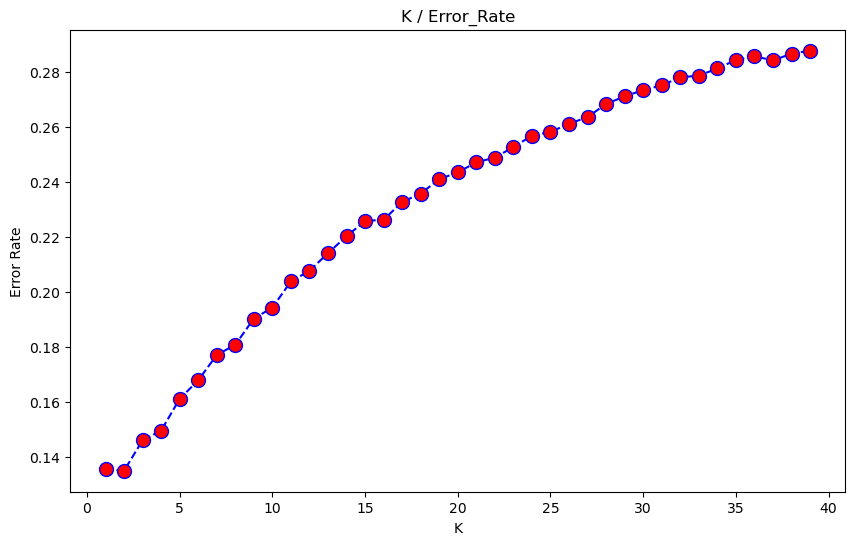

In [35]:
plt.figure(figsize = (10,6))

plt.plot(range(1,40), error_rate, color = 'blue', linestyle = '--', markersize = '10', markerfacecolor = 'red', marker = 'o')

plt.title('K / Error_Rate')
plt.xlabel('K')
plt.ylabel('Error Rate')

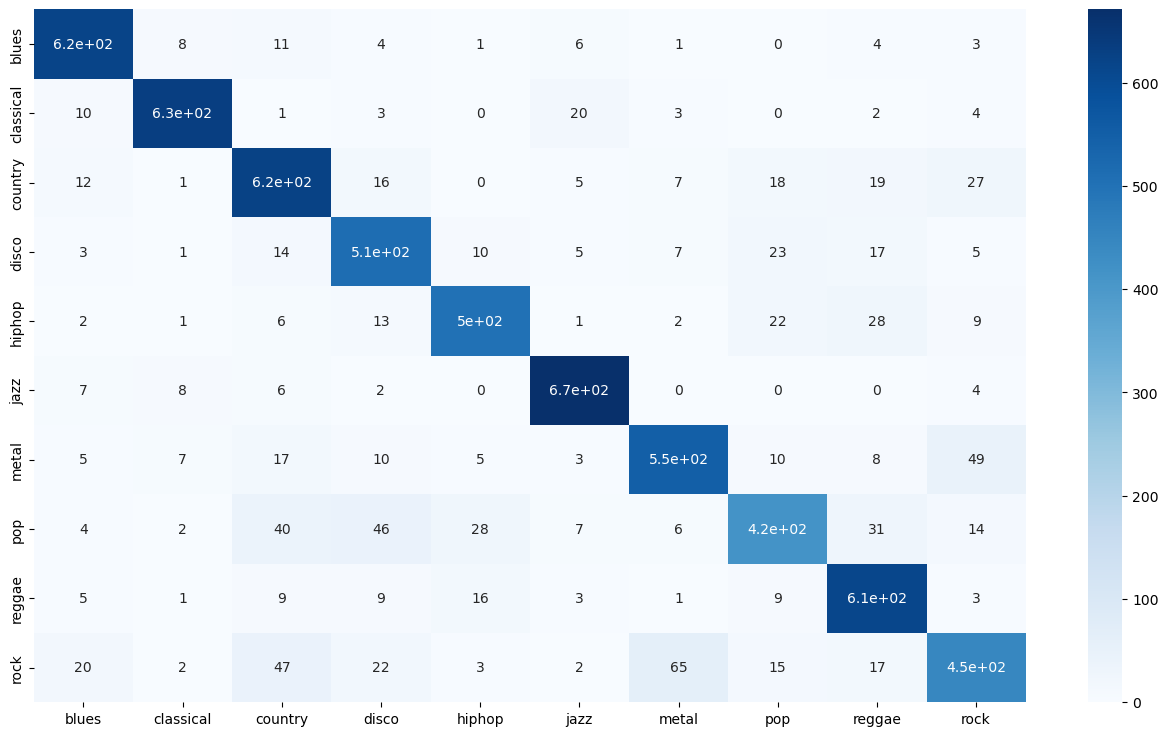

In [74]:
# Plot a confusion matrix to visualize how well the model is performing
import seaborn as sns
KNN = KNeighborsClassifier(n_neighbors = 2,weights='distance')
KNN.fit(x_train, y_train)
preds = KNN.predict(x_test)

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);

In [75]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       659
           1       0.95      0.94      0.94       676
           2       0.81      0.86      0.83       730
           3       0.80      0.86      0.83       598
           4       0.89      0.86      0.87       587
           5       0.93      0.96      0.94       698
           6       0.86      0.83      0.84       663
           7       0.81      0.70      0.75       593
           8       0.83      0.92      0.87       670
           9       0.79      0.70      0.74       640

    accuracy                           0.86      6514
   macro avg       0.86      0.86      0.85      6514
weighted avg       0.86      0.86      0.86      6514



In [76]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.8583051888240713


In [77]:
import os 
import pickle

if os.path.exists('/home/khangpt/MUSIC-GEN-PROJ/saved_model/knn_model.pkl'):
    os.remove('/home/khangpt/MUSIC-GEN-PROJ/saved_model/knn_model.pkl')
with open('/home/khangpt/MUSIC-GEN-PROJ/saved_model/knn_model.pkl','wb') as file:
    pickle.dump(KNN, file)
